# Exercises and Solutions - Analysis of High-Dimensional Data

## Diabetes data and linear regression

Load the data.

In [15]:
from matplotlib.pyplot import subplots

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from patsy import dmatrices
data = pd.read_csv('data/diabetes.csv')
data.columns
data.iloc[[0,1,2,3],[0,3,4]]
data.head(n=5)

,y,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,...,ldl.hdl,ldl.tch,ldl.ltg,ldl.glu,hdl.tch,hdl.ltg,hdl.glu,tch.ltg,tch.glu,ltg.glu
0,151,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,0.042355,-0.022038,-0.031125,-0.000922,0.033494,0.000852,0.031150,-0.028191,-0.017658,-0.027794
1,75,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,-0.021256,-0.011564,0.012973,0.023783,-0.023815,-0.094506,-0.140378,0.025298,0.053034,0.104013
2,141,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,0.033587,-0.022063,-0.018016,0.004913,0.032956,0.018281,0.032795,-0.027332,-0.017236,-0.022304
3,206,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,-0.009878,-0.009984,-0.003373,-0.019109,0.008159,0.001898,0.021514,-0.012045,-0.024872,-0.025042
4,135,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,0.012376,-0.024091,-0.026846,-0.029687,0.030984,0.014489,0.005386,-0.025575,-0.016180,0.008735


Generate a histogram of `y`.

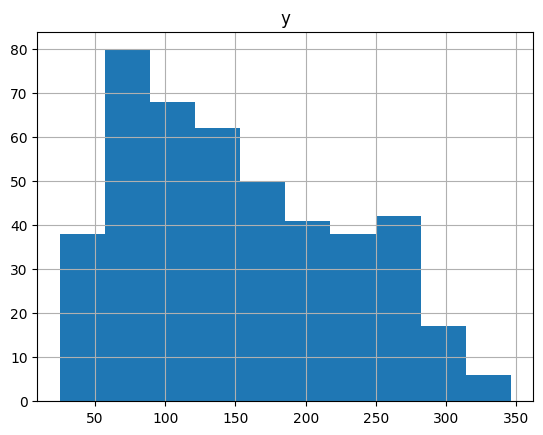

In [2]:
data.hist(column="y");

The distribution is right-skewed. Scatterplot matrix of the diabetes
data.

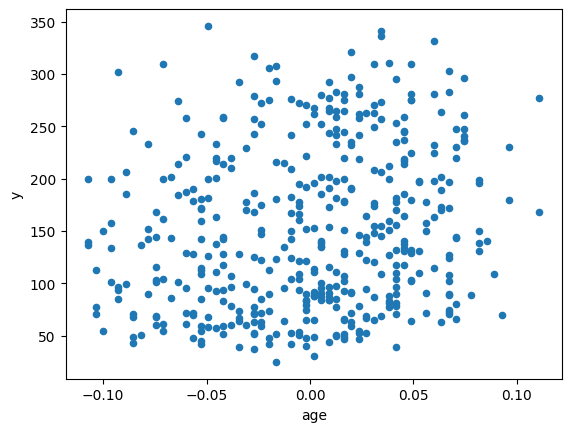

In [3]:
data.plot.scatter(x="age",y="y");

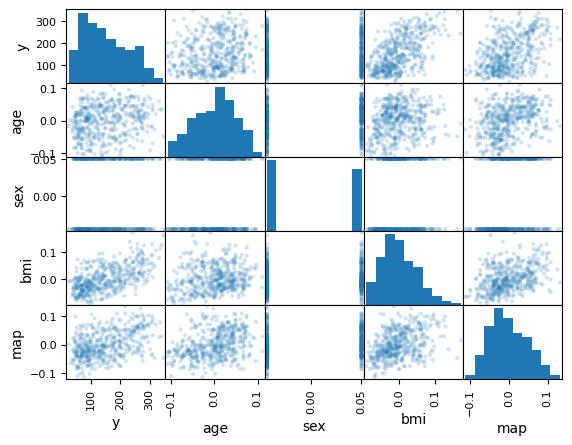

In [4]:
pd.plotting.scatter_matrix(data.iloc[:,0:5], alpha=0.2);

Create training and test data

In [6]:
rng=np.random.default_rng(1315)
train_ind = rng.choice(data.index, size=int(len(data)/2), replace=False)
data_train=data.loc[train_ind]
data_test=data.drop(data_train.index).reset_index(drop=True)

In [7]:
data_test.shape

(221, 65)

Fit a univariate regression model.

In [10]:
xtrain= pd.DataFrame({'intercept':np.ones(data_train.shape[0]),
                      'bmi':data_train['bmi']})
ytrain = data_train['y']
model1 = sm.OLS(ytrain, xtrain).fit()
model1.params.iloc[1]

np.float64(964.1513767910809)

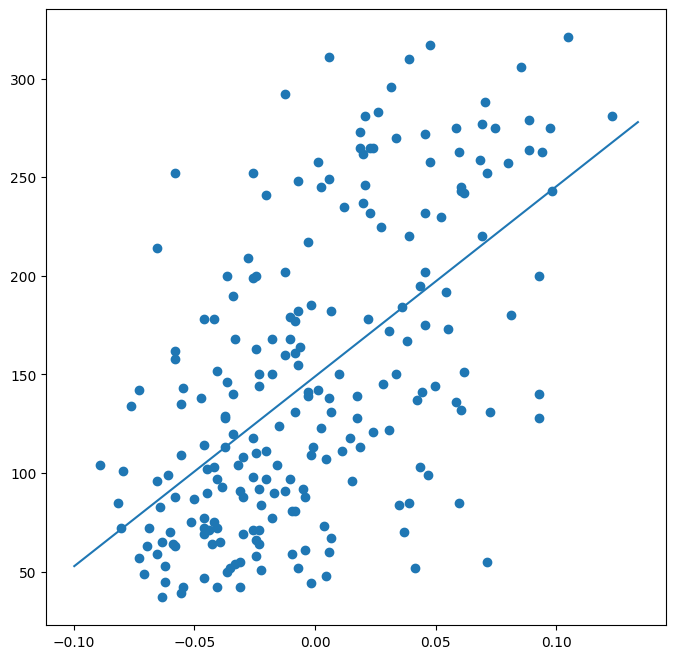

In [16]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim)
fig, ax=subplots(figsize=(8,8))
ax.scatter(xtrain['bmi'],ytrain,marker='o')
abline(ax,model1.params.iloc[0],model1.params.iloc[1])

In [17]:
print(model1.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.337
No. Observations:                 221   F-statistic:                     112.6
Covariance Type:            nonrobust   Prob (F-statistic):           1.71e-21
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.0289      4.159     35.837      0.000     140.833     157.225
bmi          964.1514     90.859     10.611      0.000     785.081    1143.222

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


We run the multiple regressio model with all covariates.

In [18]:
xtrain=data_train.drop("y",axis=1)
xtrain.insert(loc=0,column="intercept",value=np.ones(xtrain.shape[0]))
model2 = sm.OLS(ytrain, xtrain).fit()

print(model2.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.484
No. Observations:                 221   F-statistic:                     4.229
Covariance Type:            nonrobust   Prob (F-statistic):           1.23e-13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    144.5749      4.172     34.652      0.000     136.334     152.816
age          100.4232    107.906      0.931      0.353    -112.723     313.569
sex         -208.4771    110.521     -1.886      0.061    -426.788       9.834
bmi          715.1029    153.437      4.661      0.000     412.020    1018.186
map          293.2141    123.188      2.380      0.019      49.883     536.545
tc          2.231e+04   9.66e+04      0.231      0.8

Calculate the RSS.

In [20]:
sse1=np.sum(model1.resid**2)
print("SSE:",sse1)

SSE: 835422.8155627067


In [21]:
sse2=np.sum(model2.resid**2)
print("SSE:",sse2)

SSE: 462501.405258015


In [22]:
# Perform ANOVA comparison
anova_table = anova_lm(model1, model2)

# Print the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
   df_resid            ssr  df_diff        ss_diff         F    Pr(>F)
0     219.0  835422.815563      0.0            NaN       NaN       NaN
1     156.0  462501.405258     63.0  372921.410305  1.996587  0.000298


## Diabetes data and model validation

In [23]:
def RMSE(y,yhat):
    mse=np.mean((y-yhat)**2)
    return mse**(1/2)  

We calculate the RMSEs on the training data. RMSE on training data tells you how good the model “fits” the data. We cannot make any conclusion about the generalizability of the models based on RMSEs on training data. Model 2 includes many more covariates and therefore “fits” the data better (smaller training RMSE).

In [24]:
RMSE(ytrain,model1.predict())

np.float64(61.48328013027491)

In [25]:
RMSE(ytrain,model2.predict())

np.float64(45.746765346076955)

Calculate RMSEs on test data. The RMSE on test data is smaller for model 1.

In [26]:
xtest=data_test[["bmi"]]
xtest.insert(loc=0,column="intercept",value=np.ones(xtest.shape[0]))
xtest.head(n=4)
ytest=data_test["y"]
predict1=model1.predict(xtest)

In [27]:
xtest=data_test.drop("y",axis=1)
xtest.insert(loc=0,column="intercept",value=np.ones(xtest.shape[0]))
ytest=data_test["y"]
predict2=model2.predict(xtest)

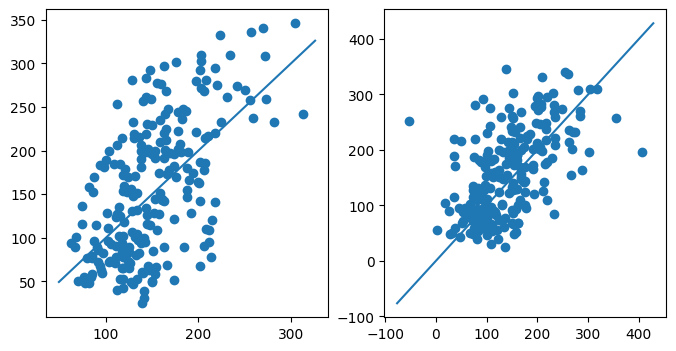

In [28]:
fig, ax=subplots(ncols=2,figsize=(8,4))
ax[0].scatter(predict1,ytest,marker='o')
abline(ax[0],0,1)
ax[1].scatter(predict2,ytest,marker='o')
abline(ax[1],0,1)

Boxplots of predicted minus observed.

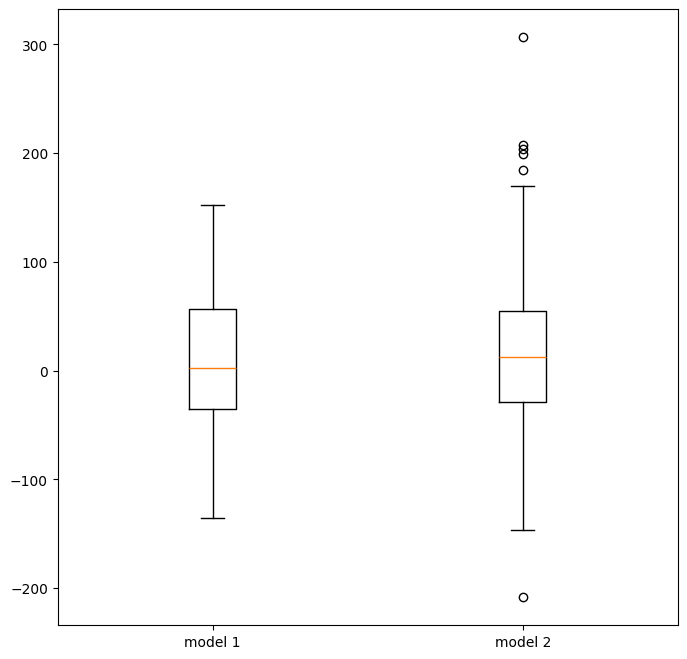

In [31]:
diff=np.array([ytest-predict1,ytest-predict2])
fig, ax=subplots(figsize=(8,8))
ax.boxplot(diff.T,tick_labels=['model 1','model 2']);

Calculate RMSEs on test data. The RMSE on test data is smaller for model 1.

In [29]:
RMSE(ytest,predict1)

np.float64(63.41116898972292)

In [30]:
RMSE(ytest,predict2)

np.float64(71.539378189051)